In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [4]:
directory_path = 'results/sum_stats'
files = os.listdir(directory_path)
dfs = [pd.read_csv(os.path.join(directory_path,file),delimiter='\t') for file in files]

In [8]:
files

['grid_n10000.tsv',
 'uniform_n10000.tsv',
 'whitebritish_n10000.tsv',
 'wales_n10000.tsv',
 'newcastle_n10000.tsv']

In [6]:
column_values = ['segsites','monosites','ac_mean','ac_sd','seg_ac_mean','seg_ac_sd','singletons']

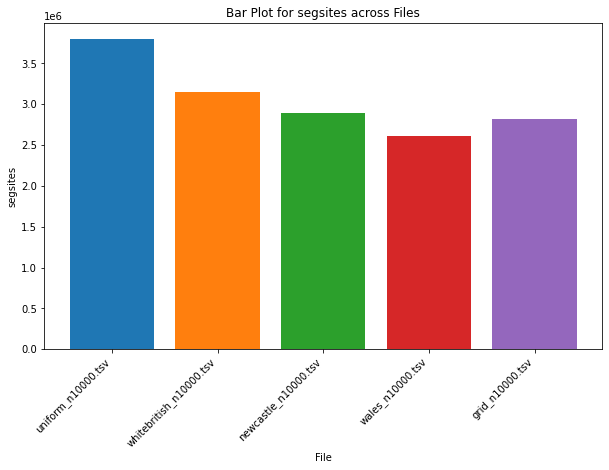

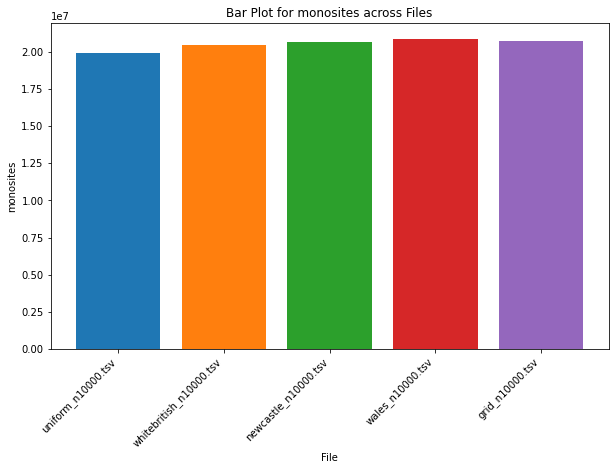

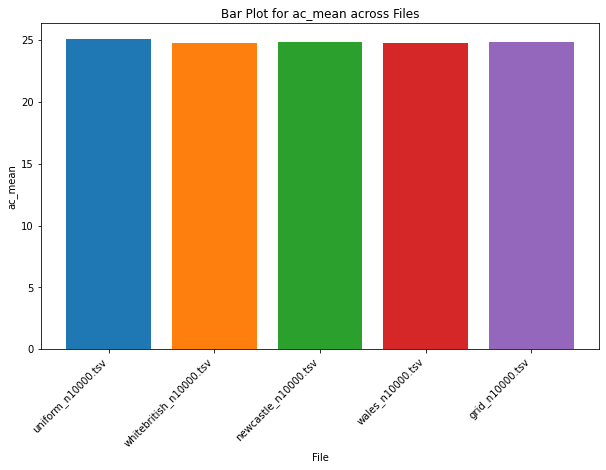

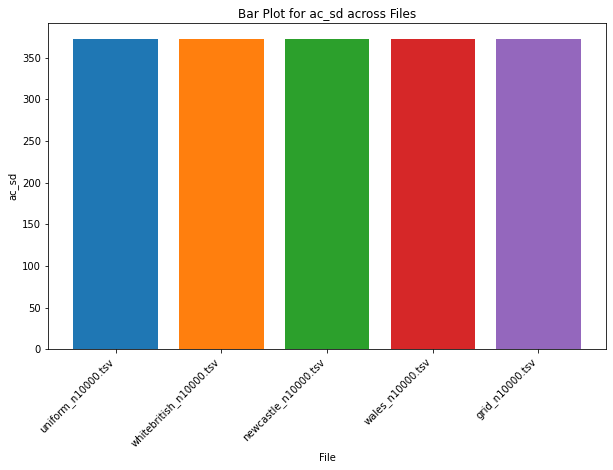

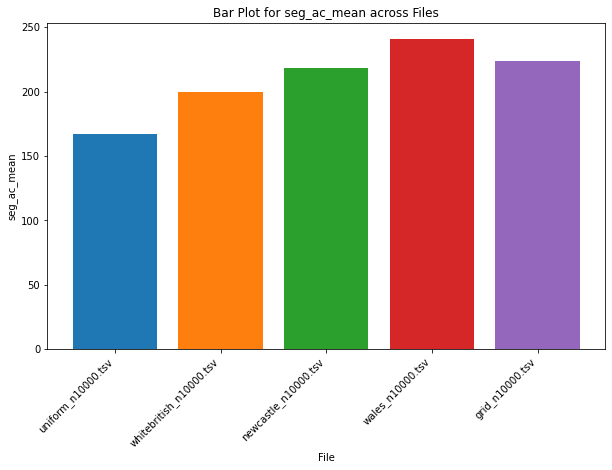

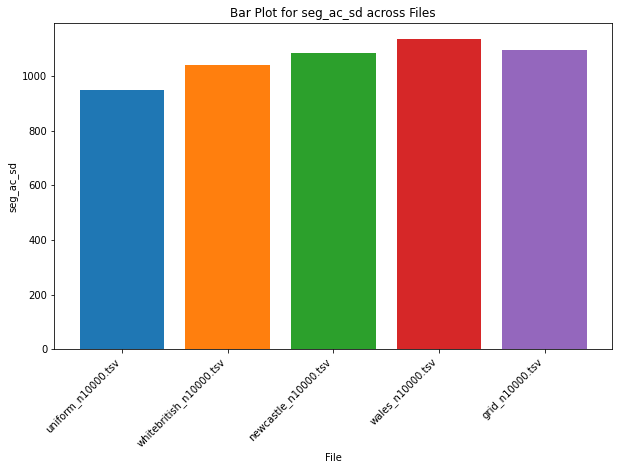

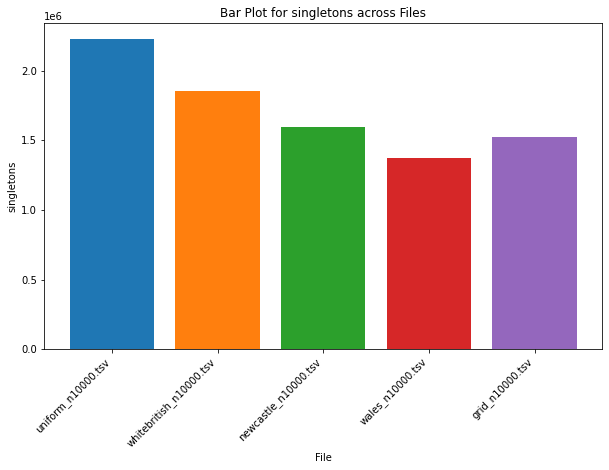

In [9]:
bar_order = [1,2,4,3,0]  # Specify the order of bars

for value in column_values:
    plt.figure(figsize=(10, 6))
    for i, df_index in enumerate(bar_order):
        df = dfs[df_index]
        plt.bar(i, df[value].mean())

    plt.xlabel('File')
    plt.ylabel(value)
    plt.title(f'Bar Plot for {value} across Files')
    plt.xticks(range(len(files)), [files[i] for i in bar_order], rotation=45, ha='right')  # Rotate x-axis labels
    plt.show()

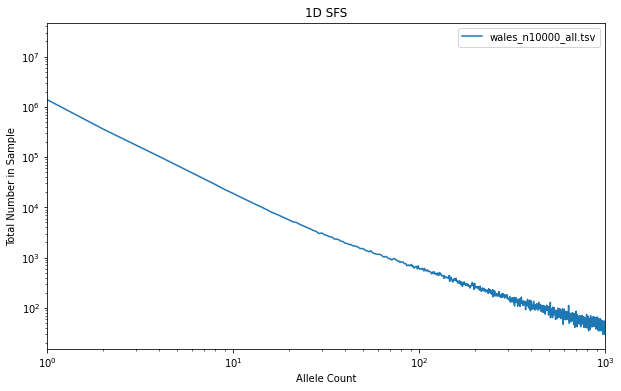

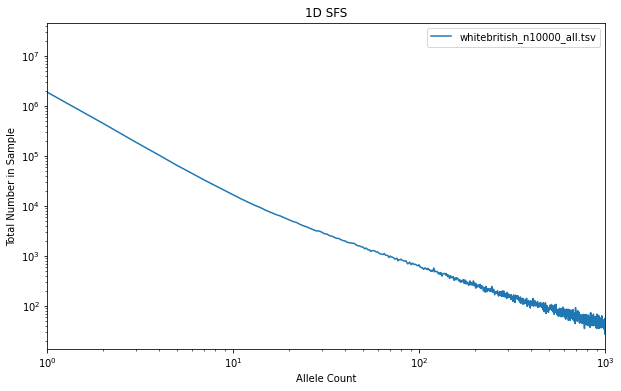

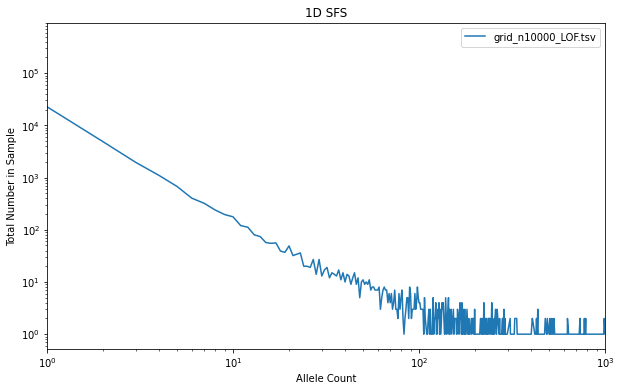

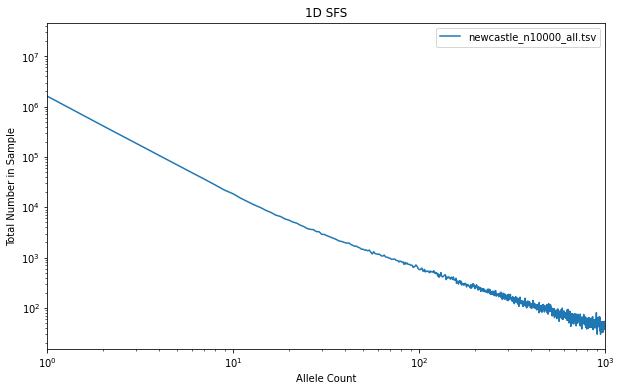

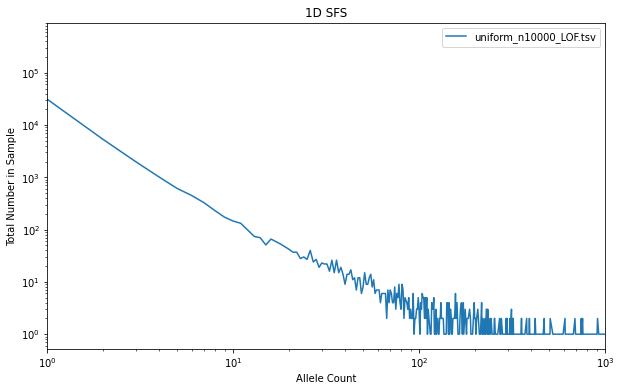

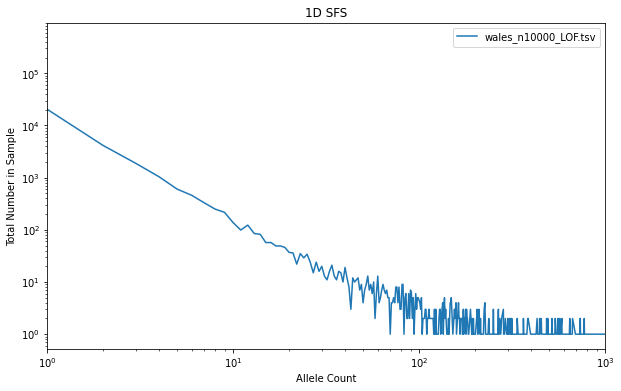

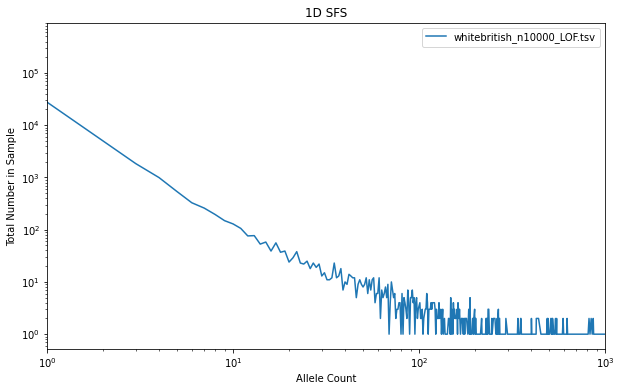

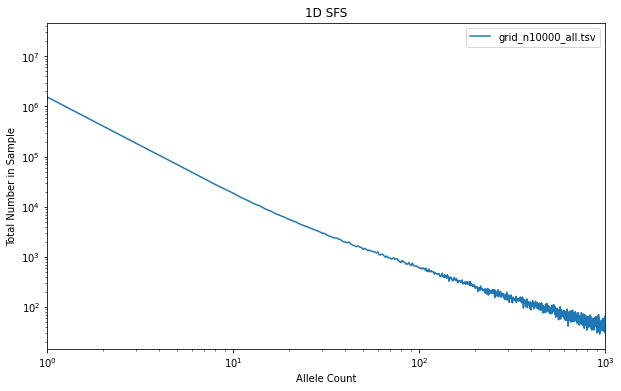

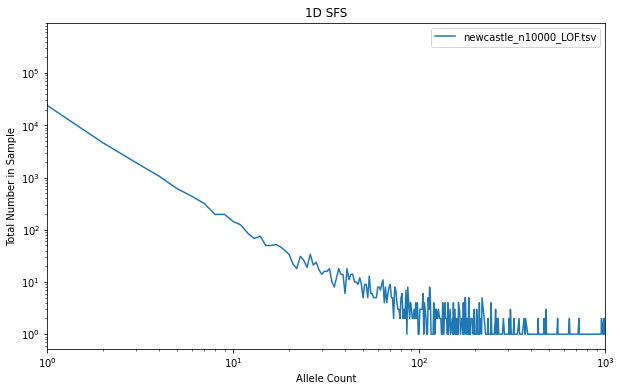

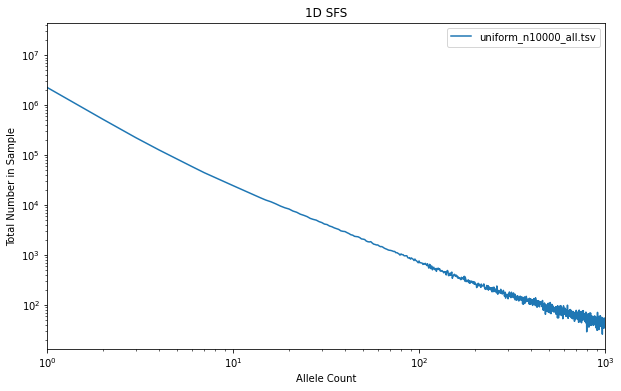

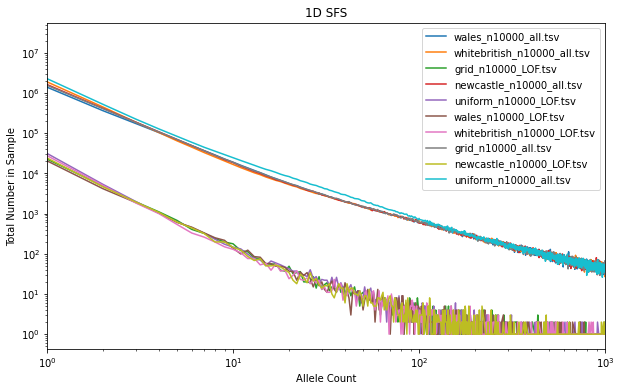

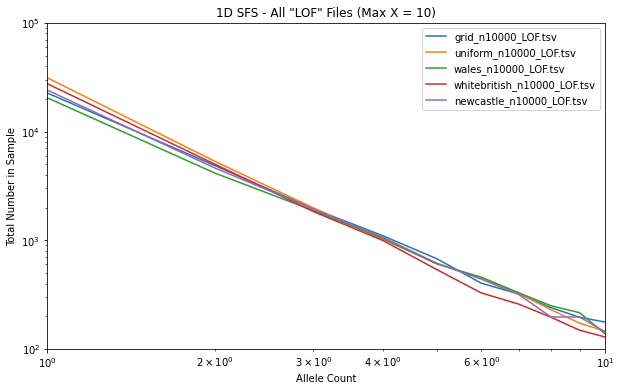

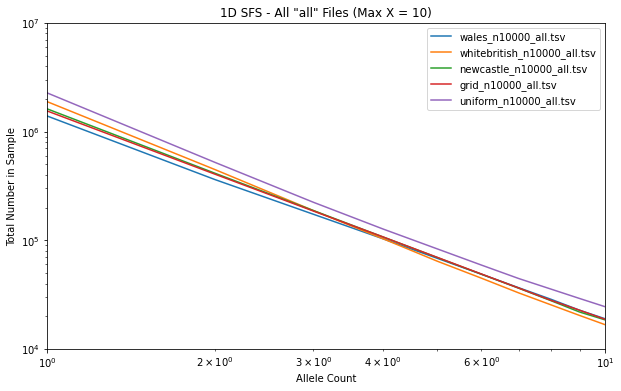

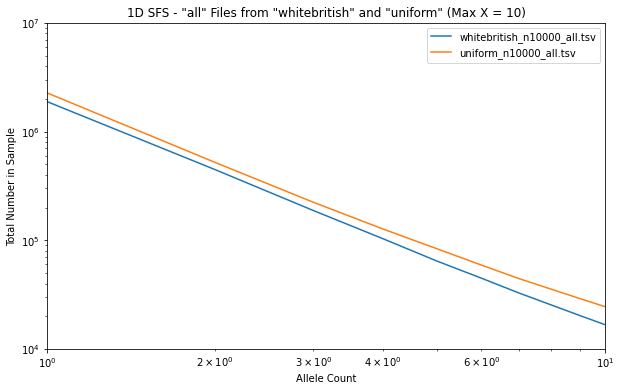

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Step 2: Read the files and extract data
directory_path = 'results/sfs'
files = os.listdir(directory_path)

x_values = []  # to store the x values for each file
y_values = []  # to store the y values for each file

lof_files = [file for file in files if "LOF" in file]
all_files = [file for file in files if "all" in file]

# Read each file and extract data, ignoring the first column
for file in files:
    with open(os.path.join(directory_path, file), 'r') as f:
        lines = f.readlines()
        x_values.append(list(map(float, lines[0].strip().split()[1:])))
        y_values.append(list(map(float, lines[1].strip().split()[1:])))

# Plot for each file separately
for i, file in enumerate(files):
    plt.figure(figsize=(10, 6))
    plt.loglog(x_values[i], y_values[i], label=file)
    plt.xlabel('Allele Count')  # Replace with your actual x-axis label
    plt.ylabel('Total Number in Sample')  # Replace with your actual y-axis label
    plt.title('1D SFS')
    plt.legend()
    plt.xlim(1, 1000)  # Set x-axis range from 1 to 1000
    plt.show()

# Plot all lines together on one plot
plt.figure(figsize=(10, 6))
for i in range(len(files)):
    plt.loglog(x_values[i], y_values[i], label=files[i])

plt.xlabel('Allele Count')  # Replace with your actual x-axis label
plt.ylabel('Total Number in Sample')  # Replace with your actual y-axis label
plt.title('1D SFS')
plt.legend()
plt.xlim(1, 1000)  # Set x-axis range from 1 to 1000
plt.show()

# Plot for filenames containing "LOF" with max X = 10, y range between 10^2 and 10^4
plt.figure(figsize=(10, 6))
for file in lof_files:
    i = files.index(file)
    plt.loglog(x_values[i], y_values[i], label=file)

plt.xlabel('Allele Count')  # Replace with your actual x-axis label
plt.ylabel('Total Number in Sample')  # Replace with your actual y-axis label
plt.title('1D SFS - All "LOF" Files (Max X = 10)')
plt.legend()
plt.xlim(1, 10)  # Set x-axis range from 1 to 10
plt.ylim(10**2, 10**5)  # Set y-axis range from 10^2 to 10^5
plt.show()

# Plot for filenames containing "all" with max X = 10, y range between 10^4 and 10^7
plt.figure(figsize=(10, 6))
for file in all_files:
    i = files.index(file)
    plt.loglog(x_values[i], y_values[i], label=file)

plt.xlabel('Allele Count')  # Replace with your actual x-axis label
plt.ylabel('Total Number in Sample')  # Replace with your actual y-axis label
plt.title('1D SFS - All "all" Files (Max X = 10)')
plt.legend()
plt.xlim(1, 10)  # Set x-axis range from 1 to 10
plt.ylim(10**4, 10**7)  # Set y-axis range from 10^4 to 10^7
plt.show()

# Plot for "all" files from "whitebritish" and "uniform" with max X = 10, y range between 10^4 and 10^7
whitebritish_uniform_files = [file for file in all_files if "whitebritish" in file or "uniform" in file]
plt.figure(figsize=(10, 6))
for file in whitebritish_uniform_files:
    i = files.index(file)
    plt.loglog(x_values[i], y_values[i], label=file)

plt.xlabel('Allele Count')  # Replace with your actual x-axis label
plt.ylabel('Total Number in Sample')  # Replace with your actual y-axis label
plt.title('1D SFS - "all" Files from "whitebritish" and "uniform" (Max X = 10)')
plt.legend()
plt.xlim(1, 10)  # Set x-axis range from 1 to 10
plt.ylim(10**4, 10**7)  # Set y-axis range from 10^4 to 10^7
plt.show()


In [64]:
# import os
# import pandas as pd
# import matplotlib.pyplot as plt

# # Step 1: Read the PC File
# pc_file_path = 'pc_data.csv'
# pc_list_df = pd.read_csv(pc_file_path, sep=',')

# # Step 2: Read the List of ID Files
# id_files_directory = 'data/id_lists'
# id_files = [f for f in os.listdir(id_files_directory) if f.endswith('.tsv')]

# # Step 3: Plot for Each ID File
# for id_file in id_files:
#     # Read the file with IDs and first two PCs
#     ids_and_pcs_df = pd.read_csv(os.path.join(id_files_directory, id_file), sep='\t')

#     # Merge the data from the ID file with the PC list
#     merged_df = pd.merge(pc_list_df, ids_and_pcs_df, left_on='participant.eid', right_on='X1', how='left')

#     # Create a new column 'InIDList' to indicate inclusion in the ID list
#     merged_df['InIDList'] = ~merged_df['X1'].isnull()

#     # Set the size of the plot
#     plt.figure(figsize=(10, 8))  # Adjust the figsize as needed

#     # Plotting
#     plt.scatter(merged_df['participant.p22009_a1'], merged_df['participant.p22009_a2'], 
#                 c=merged_df['InIDList'].map({True: 'blue', False: 'lightgrey'}),
#                 label='Data Points', s=0.5, ,zorder=2)  # Adjust the marker size and zorder as needed
#     plt.xlabel('PC1')
#     plt.ylabel('PC2') 
#     plt.title('Scatter Plot of PC1 vs PC2 for ' + id_file[:-4])  # Removing the file extension
#     plt.legend()
#     plt.show()


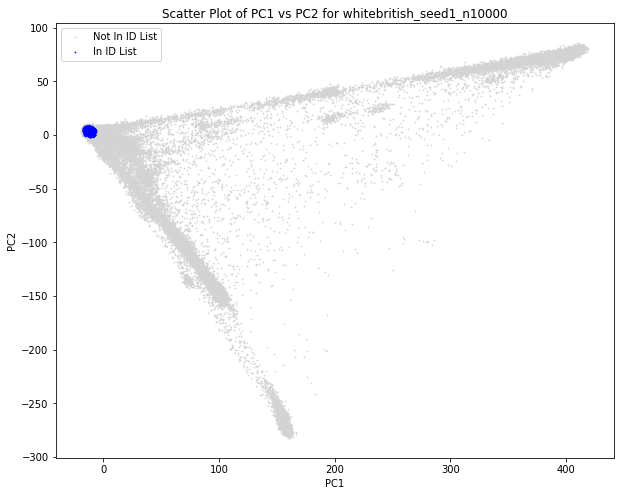

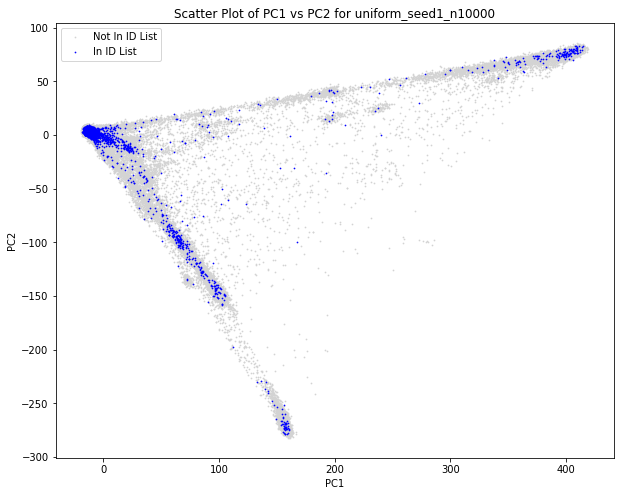

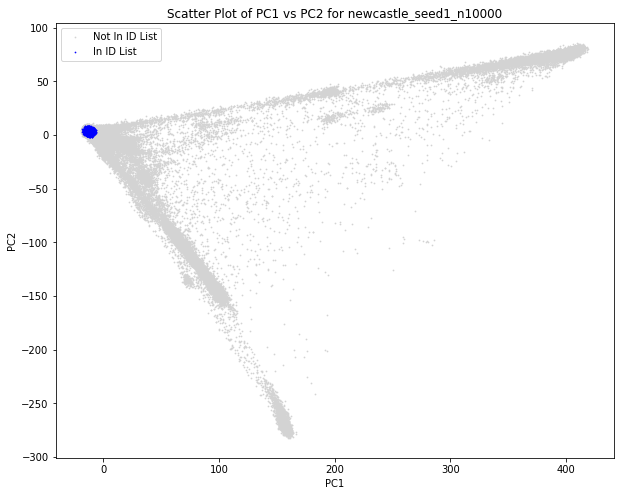

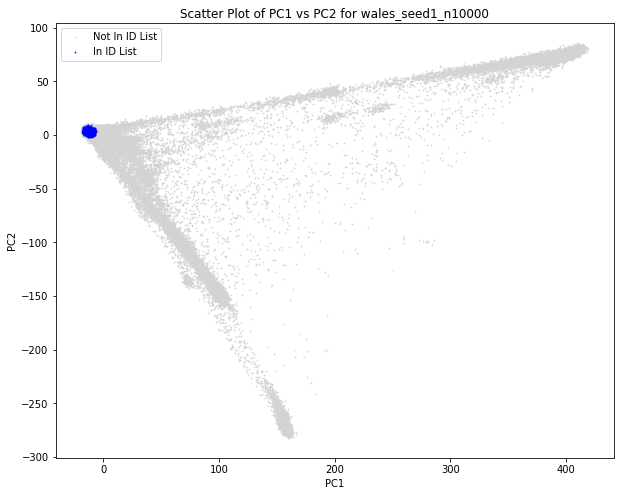

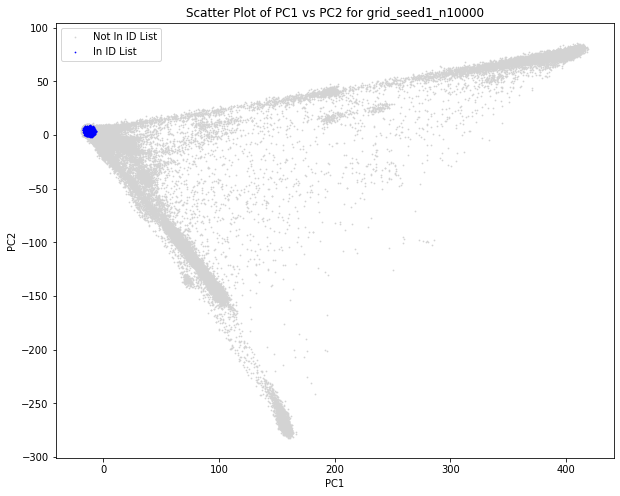

In [73]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the PC File
pc_file_path = 'pc_data.csv'
pc_list_df = pd.read_csv(pc_file_path, sep=',')

# Step 2: Read the List of ID Files
id_files_directory = 'data/id_lists'
id_files = [f for f in os.listdir(id_files_directory) if f.endswith('.tsv')]

# Plotting for Each ID File
for id_file in id_files:
    # Read the file with IDs and first two PCs
    ids_and_pcs_df = pd.read_csv(os.path.join(id_files_directory, id_file), sep='\t')

    # Merge the data from the ID file with the PC list
    merged_df = pd.merge(pc_list_df, ids_and_pcs_df, left_on='participant.eid', right_on='X1', how='left')

    # Create a new column 'InIDList' to indicate inclusion in the ID list
    merged_df['InIDList'] = ~merged_df['X1'].isnull()

    # Set the size of the plot
    plt.figure(figsize=(10, 8))  # Adjust the figsize as needed

    

    # Plotting Grey Dots
    grey_df = merged_df[~merged_df['InIDList']]
    plt.scatter(grey_df['participant.p22009_a1'], grey_df['participant.p22009_a2'], 
                c='lightgrey',
                label='Not In ID List', s=0.5)
    
    # Plotting Blue Dots
    blue_df = merged_df[merged_df['InIDList']]
    plt.scatter(blue_df['participant.p22009_a1'], blue_df['participant.p22009_a2'], 
                c='blue',
                label='In ID List', s=0.5)

    plt.xlabel('PC1')
    plt.ylabel('PC2') 
    plt.title(f'Scatter Plot of PC1 vs PC2 for {id_file[:-4]}')  # Removing the file extension
    plt.legend()
    plt.show()


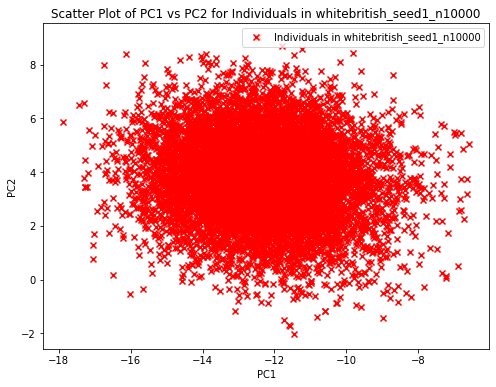

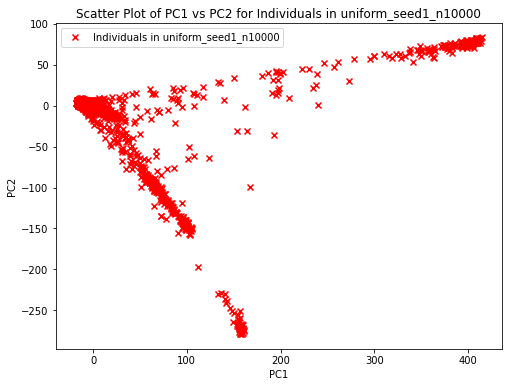

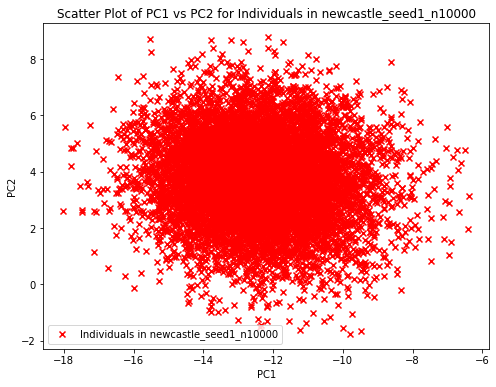

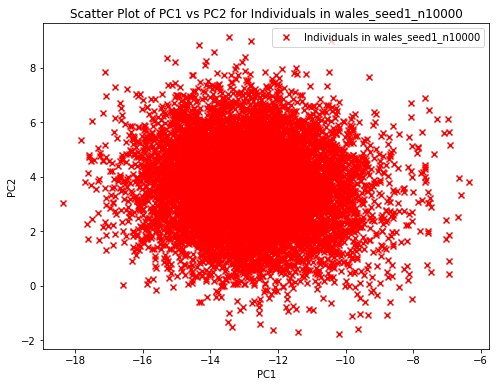

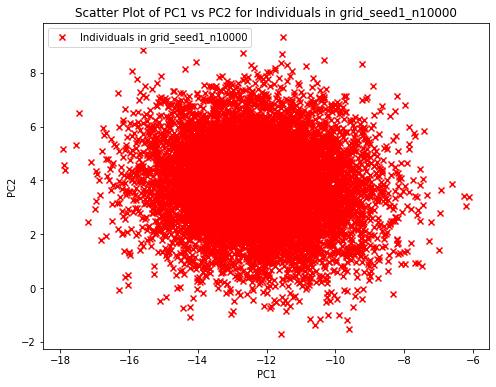

In [55]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the PC File
pc_file_path = 'pc_data.csv'
pc_list_df = pd.read_csv(pc_file_path, sep=',')

# Step 2: Read the List of ID Files
id_files_directory = 'data/id_lists'
id_files = [f for f in os.listdir(id_files_directory) if f.endswith('.tsv')]

# Step 3: Plot for Each ID File
for id_file in id_files:
    # Read the file with IDs and first two PCs
    ids_and_pcs_df = pd.read_csv(os.path.join(id_files_directory, id_file), sep='\t')

    # Merge the data from the ID file with the PC list
    merged_df = pd.merge(pc_list_df, ids_and_pcs_df, left_on='participant.eid', right_on='X1', how='inner')

    # Set the size of the plot
    plt.figure(figsize=(8, 6))  # Adjust the figsize as needed

    # Plotting for individuals in the file
    plt.scatter(merged_df['participant.p22009_a1'], merged_df['participant.p22009_a2'], color='red', label='Individuals in ' + id_file[:-4], marker='x')

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Scatter Plot of PC1 vs PC2 for Individuals in ' + id_file[:-4])  # Removing the file extension
    plt.legend()
    plt.show()


In [70]:
zorder

0         1
1         1
2         1
3         1
4         1
         ..
502363    1
502364    1
502365    1
502366    1
502367    1
Name: InIDList, Length: 502368, dtype: int64